# Biologically-Inspired Computation Coursework

## Course: F20BC/F21BC - Biologically-Inspired Computation

### **Implementation of Artificial Neural Networks (ANNs) and Particle Swarm Optimization (PSO)**  


**Group Members**:
- **Ahmad Meda**  
  - Heriot-Watt ID: H00414901
- **Ibrahim Rathwala**  
  - Heriot-Watt ID: H00403230

---

### Introduction:

As part of our Biologically-Inspired Computation course, this coursework focuses on the practical implementation and experimental investigation of two biologically-inspired algorithms: **Artificial Neural Networks (ANNs)** and **Particle Swarm Optimization (PSO)**. The main objective is to develop these algorithms from scratch and use PSO to optimize the parameters of a multi-layer ANN to solve a real-world regression problem.

In this project, we will:

1. **Implement a Multi-Layer Artificial Neural Network (ANN)**  
   We'll build a feedforward neural network with configurable layers, neurons, and activation functions.

2. **Implement Particle Swarm Optimization (PSO)**  
   We'll design a PSO algorithm that optimizes the weights and biases of the ANN.

3. **Train the ANN Using PSO**  
   We'll use PSO to train the ANN on a concrete regression task and optimize its performance.

4. **Train the ANN on the Concrete Compressive Strength Dataset**  
   We'll apply the ANN and PSO to the Concrete Compressive Strength Dataset, which includes 8 features representing physical properties of concrete and 1 target variable, the compressive strength.

5. **Experiment with Hyperparameters**  
   We'll explore the effects of changing the ANN architecture (number of layers, neurons, and activation functions) and PSO hyperparameters (e.g., swarm size, iterations) on the model’s ability to learn.

6. **Analyze Results and Write a Report**  
   We'll summarize our approach, experiments, and results in a comprehensive report, outlining key findings and the effectiveness of PSO in optimizing the ANN.

---

### Problem Domain:

The problem we are addressing is a **regression task**, where the goal is to predict the **compressive strength of concrete** given 8 input features that describe the concrete's composition and physical properties. We will use the **Concrete Compressive Strength Dataset** from the **Kaggle** for this purpose. Our model's performance will be evaluated using the **Mean Squared Error (MSE)**.

---

In [73]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt      
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from IPython.display import display, clear_output
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown


### Step 1: Load and Explore the Concrete Compressive Strength Dataset
We will start by loading the dataset and examining its structure, missing values, and overall distribution of features. The dataset consists of 8 input features and 1 target variable which is the compressive strength of concrete.


In [74]:
df = pd.read_csv('concrete_data.csv')

## **Exploring the Dataset**

In [75]:
df.head()
df.info() 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## **Understanding the Correlation between features**

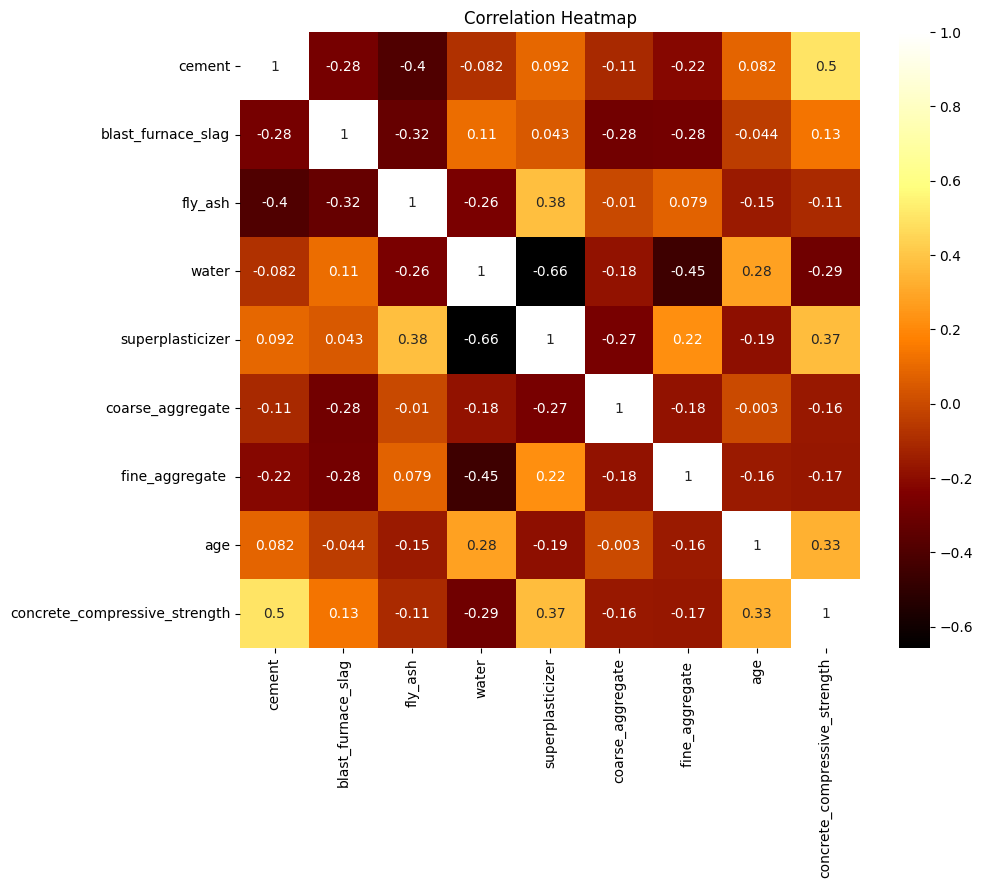

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="afmhot")
plt.title("Correlation Heatmap")
plt.show()

## **Data Preprocessing**

In [77]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = (y - y.mean()) / y.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Building an ANN**

We developed an Artificial Neural Network (ANN) designed for a regression task, offering flexibility in its architecture and activation functions, making it ideal for experimentation and further optimization using Particle Swarm Optimization (PSO). The network is initialized with a configurable structure defined by `layer_config` to specify the number of neurons in each layer and `activation_funcs` to determine the activation functions for the hidden layers. The network supports three activation functions including Sigmoid, which provides smooth transitions with outputs in the range [0, 1], ReLU, which is efficient for deeper networks due to its sparse activations, and Tanh, which centers the data around zero with outputs in the range [-1, 1]. During the forward pass, inputs are transformed using the formula \(z = XW + b\) and passed through the specified activation functions in the hidden layers, while the output layer remains linear to accommodate regression tasks. The `set_parameters` method allows easy updates to weights and biases using a flat parameter vector, enabling seamless integration with optimization algorithms. Additionally, the `get_total_parameters` method computes the total number of trainable parameters in the network, providing insight into its complexity and capacity.

In [78]:
class NeuralNetwork:
    def __init__(self, layer_config, activation_funcs):
        # Defining layers and activation functions
        self.layer_config = layer_config
        self.activation_funcs = activation_funcs

    def _activation(self, x, func):
        # Implementing activation functions: Sigmoid, ReLU, and Tanh
        if func == "sigmoid":
            return 1 / (1 + np.exp(-x))
        elif func == "relu":
            return np.maximum(0, x)
        elif func == "tanh":
            return np.tanh(x)
        else:
            raise ValueError(f"Unsupported activation function: {func}")  # Handling invalid activation functions

    def forward(self, X):
        # Performing forward pass to compute the output
        current_input = X
        for i in range(len(self.weights)):
            current_input = np.dot(current_input, self.weights[i]) + self.biases[i]
            if i < len(self.activation_funcs):
                current_input = self._activation(current_input, self.activation_funcs[i])
        return current_input

    def set_parameters(self, param_vector):
        self.weights = []
        self.biases = []
        idx = 0
        for i in range(len(self.layer_config) - 1):
            input_size = self.layer_config[i]
            output_size = self.layer_config[i + 1]
            weight_size = input_size * output_size
            self.weights.append(param_vector[idx:idx + weight_size].reshape((input_size, output_size)))
            idx += weight_size
            self.biases.append(param_vector[idx:idx + output_size])
            idx += output_size

    def get_total_parameters(self):
        # Calculating the total number of parameters
        total = 0
        for i in range(len(self.layer_config) - 1):
            total += self.layer_config[i] * self.layer_config[i + 1] + self.layer_config[i + 1]
        return total

### **Defining a Particle for PSO**

We implemented the `Particle` class to represent an individual particle in our Particle Swarm Optimization (PSO) algorithm. Each particle is initialized with a randomly generated position and velocity within the specified bounds, ensuring diverse starting points in the solution space. The `position` attribute represents the particle's current location, while the `velocity` determines its direction and speed of movement. We also include a `best_position` attribute to store the best solution the particle has found so far, and a `best_fitness` attribute to track the corresponding fitness value, which we initialize to infinity. This setup allows each particle to independently explore the solution space and contribute to the optimization process.

In [79]:
class Particle:
    def __init__(self, dim, bounds):
        # Initializing the particle's position, velocity, best position, and best fitness
        self.position = np.random.uniform(bounds[0], bounds[1], dim)
        self.velocity = np.random.uniform(-abs(bounds[1] - bounds[0]), abs(bounds[1] - bounds[0]), dim)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

### **Implementing the PSO Algorithm**

We implemented the Particle Swarm Optimization (PSO) algorithm to optimize the parameters of our Artificial Neural Network (ANN) by simulating a group of particles exploring the solution space. Each particle represents a possible solution, with a position (current solution) and a velocity (direction and speed of movement). We start by initializing a swarm of particles, assigning them random positions and velocities within specified bounds, and setting key parameters such as inertia, cognitive (self-driven exploration), and social (influence from others) factors. Using the `_update_velocity_position` method, we update each particle's velocity based on its personal best position, the best position of its informants (randomly chosen particles), and its previous velocity. In the `optimize` method, we evaluate the fitness of each particle at every step, update their personal best positions, and adjust the global best based on the swarm's overall performance. We ensure that all movements stay within the defined bounds of the solution space. After running the optimization for a set number of iterations, we return the best solution and fitness value found by the swarm.

In [80]:
class PSO:
    def __init__(self, n_particles, dim, bounds, cognitive, social, n_informants, inertia):
        # Initializing particles, global best, and PSO parameters
        self.particles = [Particle(dim, bounds) for _ in range(n_particles)]
        self.global_best_position = None
        self.global_best_fitness = float('inf')
        self.cognitive = cognitive
        self.social = social
        self.bounds = bounds
        self.n_informants = n_informants
        self.inertia = inertia

    def _update_velocity_position(self, particle, informant_positions, fitness_function):
        # Updating particle velocity and position using cognitive, social, and inertia components
        r1, r2 = np.random.rand(), np.random.rand()
        cognitive_component = self.cognitive * r1 * (particle.best_position - particle.position)
        best_informant_position = min(informant_positions, key=lambda pos: fitness_function(pos))
        social_component = self.social * r2 * (best_informant_position - particle.position)
        
        # Applying inertia and updating velocity
        particle.velocity = self.inertia * particle.velocity + cognitive_component + social_component
        velocity_max = abs(self.bounds[1] - self.bounds[0])
        particle.velocity = np.clip(particle.velocity, -velocity_max, velocity_max)
        
        # Updating position and applying boundary constraints
        particle.position += particle.velocity
        particle.position = np.clip(particle.position, *self.bounds)

    def optimize(self, fitness_function, n_iterations):        
        # Initializing global best using fitness function
        for particle in self.particles:
            fitness = fitness_function(particle.position)
            if fitness < self.global_best_fitness:
                self.global_best_fitness = fitness
                self.global_best_position = particle.position.copy()
        
        # Iterative optimization
        for _ in range(n_iterations):
            for particle in self.particles:
                fitness = fitness_function(particle.position)
                
                # Updating personal best if fitness improves
                if fitness < particle.best_fitness:
                    particle.best_fitness = fitness
                    particle.best_position = particle.position.copy()
                
                # Updating global best if fitness improves
                if fitness < self.global_best_fitness:
                    self.global_best_fitness = fitness
                    self.global_best_position = particle.position.copy()
                
                # Selecting informants and updating particle velocity and position
                informants = np.random.choice(self.particles, min(self.n_informants, len(self.particles)), replace=False)
                informant_positions = [inf.best_position for inf in informants]
                self._update_velocity_position(particle, informant_positions, fitness_function)

        return self.global_best_position, self.global_best_fitness

### **Building the GUI for PSO-Based ANN Experiment**

We developed an interactive GUI using `ipywidgets` to streamline the experimentation process with Artificial Neural Networks (ANN) and Particle Swarm Optimization (PSO). The GUI allows us to configure the ANN architecture by selecting the number of hidden layers and dynamically generating sliders for adjusting the number of neurons and dropdowns for choosing activation functions (`relu`, `tanh`, or `sigmoid`) for each layer. Additionally, we added sliders to set PSO parameters such as swarm size, number of iterations, cognitive and social coefficients, and inertia weight. The `run_experiment` function ties everything together by collecting user inputs, dynamically building the ANN, and running PSO to optimize its parameters. It evaluates the ANN’s performance using Mean Absolute Error (MAE) and visualizes the results with plots, including bar charts for MAE, scatter plots for predictions vs. actual values, residual plots, and convergence plots for PSO fitness values. This interface is responsive and easy to use, allowing us to experiment with different configurations and optimization settings efficiently while receiving real-time feedback.

In [ ]:
# Layer selector for dynamically adjusting the number of layers
layers_slider = widgets.IntSlider(value=2, min=1, max=5, step=1, description="Layers:")
update_button = widgets.Button(description="Update Layers")

# Containers for dynamically adding neuron count and activation function widgets per layer
neurons_containers = []
activation_containers = []
layer_widgets_box = widgets.VBox()  # Box to hold all layer-specific widgets

# Widgets for PSO parameters: swarm size and number of iterations
swarm_slider = widgets.IntSlider(value=30, min=10, max=100, step=5, description="Swarm Size:")
iterations_slider = widgets.IntSlider(value=50, min=10, max=200, step=5, description="Iterations:")
run_button = widgets.Button(description="Run Experiment")

# Sliders for PSO tuning: cognitive, social, and inertia parameters
cognitive_slider = widgets.FloatSlider(value=2.0, min=0.5, max=3.0, step=0.1, description="Cognitive (c1):")
social_slider = widgets.FloatSlider(value=2.0, min=0.5, max=3.0, step=0.1, description="Social (c2):")
inertia_slider = widgets.FloatSlider(value=0.9, min=0.4, max=1.2, step=0.1, description="Inertia (w):")

In [82]:
output_area = widgets.Output()

def update_layer_widgets(change):
    global neurons_containers, activation_containers, layer_widgets_box
    neurons_containers = []  
    activation_containers = []  

    # Getting the number of layers from the slider
    n_layers = layers_slider.value

    # Creating widgets for neurons in each hidden layer
    for i in range(n_layers):
        neurons_slider = widgets.IntSlider(value=4, min=2, max=20, step=1, description=f"Neurons L{i + 1}:")
        neurons_containers.append(neurons_slider)

    # Creating widgets for activation functions in each hidden layer
    for i in range(n_layers):
        activation_dropdown = widgets.Dropdown(
            options=["relu", "tanh", "sigmoid"],
            value="relu",
            description=f"Activation L{i + 1}:"
        )
        activation_containers.append(activation_dropdown)

    # Updating the layer widgets dynamically to reflect the selected number of layers
    layer_widgets_box.children = [
        widgets.HBox([neurons_containers[i], activation_containers[i]]) for i in range(n_layers)
    ]

In [83]:
def run_experiment(change):
    with output_area:
        clear_output(wait=True)

        # Retrieving user-selected parameters for the experiment
        layer_neurons = [neurons.value for neurons in neurons_containers]
        activation_functions = [activation.value for activation in activation_containers]
        swarm_size = swarm_slider.value
        iterations = iterations_slider.value
        cognitive = cognitive_slider.value
        social = social_slider.value
        inertia = inertia_slider.value
        n_runs = 10

        # Configuring the ANN architecture
        layer_config = [8] + layer_neurons + [1]
        required_activations = len(layer_neurons)
        if len(activation_functions) > required_activations:
            activation_functions = activation_functions[:required_activations]
        elif len(activation_functions) < required_activations:
            while len(activation_functions) < required_activations:
                activation_functions.append(activation_functions[-1])

        print(f"Running experiment with:")
        print(f"  Input Layer: 8 features")
        print(f"  Hidden Layers: {layer_neurons}")
        print(f"  Output Layer: 1 node (regression, no activation)")
        print(f"  Activation Functions: {activation_functions}")
        print(f"  Swarm Size: {swarm_size}, Iterations: {iterations}, Runs: {n_runs}")
        print(f"  PSO Parameters: Cognitive: {cognitive}, Social: {social}, Inertia: {inertia}")

        # Initializing the ANN and computing total parameters
        ann = NeuralNetwork(layer_config, activation_functions)
        dimension = ann.get_total_parameters()
        print(f"Total parameters in ANN: {dimension}")

        # Running PSO optimization across multiple runs
        maes = []
        fitness_history_all_runs = []
        best_predictions = None
        best_mae = float('inf')

        for run in range(n_runs):
            print(f"Run {run + 1}/{n_runs}")
            fitness_history = [] 

            pso = PSO(
                n_particles=swarm_size,
                dim=dimension,
                bounds=(-1, 1),
                cognitive=cognitive,
                social=social,
                n_informants=3,
                inertia=inertia,
            )

            def fitness_function(params, model, X, y, history=None):
                model.set_parameters(params)
                predictions = model.forward(X)
                mae = np.mean(np.abs(predictions - y))
                if history is not None:
                    history.append(mae)
                return mae

            # Optimizing the particle swarm
            gBest_position, _ = pso.optimize(lambda params: fitness_function(params, ann, X_train, y_train, fitness_history), iterations)
            fitness_history_all_runs.append(fitness_history)

            # Evaluating on the test set
            ann.set_parameters(gBest_position)
            predictions = ann.forward(X_test)
            mae = np.mean(np.abs(predictions - y_test))
            maes.append(mae)

            # Updating the best predictions and MAE
            if mae < best_mae:
                best_mae = mae
                best_predictions = predictions

        # Computing final results
        mae_mean = np.mean(maes)
        mae_std = np.std(maes)
        print(f"\nResults:")
        print(f"  MAE Mean: {mae_mean:.4f}")
        print(f"  MAE Std: {mae_std:.4f}")

        # Generating plots
        plt.figure(figsize=(16, 12))

        # Ploting MAE bar chart across all runs
        plt.subplot(3, 2, 1)
        plt.bar(range(1, n_runs + 1), maes, color="skyblue")
        plt.axhline(mae_mean, color="red", linestyle="--", label="Mean MAE")
        plt.xlabel("Run")
        plt.ylabel("Mean Absolute Error (MAE)")
        plt.title("MAE for Each Run")
        plt.legend()

        # Plotting actual vs predicted values
        plt.subplot(3, 2, 2)
        plt.scatter(y_test, best_predictions, alpha=0.6, color="green")
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Predictions vs. Actual (Best Run)")

        # Plotting residuals vs actual values
        plt.subplot(3, 2, 3)
        residuals = y_test - best_predictions
        plt.scatter(y_test, residuals, alpha=0.6, color="purple")
        plt.axhline(0, color="red", linestyle="--")
        plt.xlabel("Actual")
        plt.ylabel("Residuals")
        plt.title("Residual Plot")

        # Plotting fitness convergence across all runs
        plt.subplot(3, 2, 4)
        for run_idx, history in enumerate(fitness_history_all_runs):
            plt.plot(history, label=f"Run {run_idx + 1}")
        plt.xlabel("Iteration")
        plt.ylabel("Fitness Value (MAE)")
        plt.title("PSO Fitness Convergence")
        plt.legend()

        plt.tight_layout()
        plt.show()

In [84]:
# Linking buttons
update_button.on_click(update_layer_widgets)
run_button.on_click(run_experiment)

# GUI
update_layer_widgets(None)
display(widgets.VBox([
    layers_slider,
    update_button,
    layer_widgets_box,
    widgets.HBox([swarm_slider, iterations_slider]),
    widgets.HBox([cognitive_slider, social_slider, inertia_slider]),
    run_button,
    output_area
]))

# **Test Cases for PSO-Based ANN Experiment**

Below are the test cases run sequentially, adjusting parameters based on trial-and-error and observations from previous runs. Each test case includes the configuration details and space for inserting result graphs.

---

## **Question 1: The effect of ANN's architecture to solve a given problem**

To understand how the ANN architecture affects its performance, we tested different combinations of hidden layers, neurons, and activation functions. The architecture determines how well the network can learn patterns, so we expected more layers and neurons to initially improve performance by increasing the model's capacity. However, too many layers or neurons could lead to overfitting or slower convergence.

We hypothesize that increasing the number of layers and neurons will initially improve the network's performance by enhancing its ability to learn complex patterns. However, we expect that beyond a certain point, adding more layers or neurons might lead to overfitting or slower convergence, negatively impacting the results.

We started with a simple single-layer network as a baseline and gradually added more layers and neurons to see if the network could handle the regression task better. For activation functions, we compared `relu`, `tanh`, and `sigmoid` to see which worked best for capturing non-linear patterns.

To make the experiments fair, we kept the PSO parameters constant and ran each configuration 10 times to handle randomness. Our goal was to find the architecture that gives the best accuracy (lowest MAE) without unnecessary complexity.

#### **Fixed Parameters**
Since we are experimmenting the effect of ANN's problem solving based on its architecture,we will keep the following PSO parameters constant throughout this experiment:

| **Parameter**            | **Value**          |
|---------------------------|--------------------|
| **Swarm Size**            | 50                |
| **Iterations**            | 50                |
| **Cognitive Coefficient (c1)** | 1.5        |
| **Social Coefficient (c2)**    | 1.5        |
| **Inertia Weight (w)**         | 0.9        |



#### **Experiment Results**


| **Test Case** | **Hidden Layers** | **Neurons per Layer**       | **Activation Functions**          | **MAE Mean** | **MAE Std** |
|---------------|--------------------|-----------------------------|------------------------------------|--------------|-------------|
| **1**         | 1                 | [4]                        | `ReLU`                            | 0.6196        | 0.0281       |
| **2**         | 2                 | [6, 4]                     | `Tanh`, `Sigmoid`                 | 0.5358        | 0.0306       |
| **3**         | 3                 | [8, 6, 4]                  | `ReLU`, `Tanh`, `Sigmoid`         | 0.5719        | 0.0280       |
| **4**         | 4                 | [10, 8, 6, 4]              | `ReLU`, `ReLU`, `Tanh`, `Sigmoid` | 0.6147        | 0.0310       |
| **5**         | 3                 | [12, 8, 6]                 | `ReLU`, `ReLU`, `Tanh`            | 0.7087        | 0.0353       |
| **6**         | 4                 | [15, 10, 8, 5]             | `ReLU`, `Tanh`, `Tanh`, `Sigmoid` | 0.5862        | 0.0317       |


### **Results Visualization**

#### **Test Case 1**
![Test Case 1](q1-t1.jpeg)

#### **Test Case 2**
![Test Case 2](q1-t2.jpeg)

#### **Test Case 3**
![Test Case 3](q1-t3.jpeg)

#### **Test Case 4**
![Test Case 4](q1-t4.jpeg)

#### **Test Case 5**
![Test Case 5](q1-t5.jpeg)

#### **Test Case 6**
![Test Case 6](q1-t6.jpeg)

## **Results Analysis**


We began our experiments with a simple single-layer network (Test Case 1) as a baseline. While it performed adequately, the results improved significantly when we added a second layer with `Tanh` and `Sigmoid` activations in Test Case 2. We thought this meant that additional depth made the network to learn patterns more effectively. Building on this, we explored deeper architectures in Test Cases 3 and 4, adding more layers with different activation functions. However, the performance started to degrade slightly, indicating that increasing depth without careful tuning could lead to diminishing returns or potential overfitting. 

In Test Case 5, we increased the number of neurons across three layers, but the performance worsened, likely due to overfitting or slower convergence. Finally, Test Case 6, which involved a deeper architecture with fewer neurons and mixed activations, showed an improvement compared to Test Case 5 but did not outperform the simpler configuration in Test Case 2.

Overall we discovered that **Test Case 2** delivered the best performance with its balanced architecture of two layers and `Tanh` and `Sigmoid` activations. This showed that a moderately complex and well-tuned network can outperform more complicated architectures.


## **Question 2: The best way of allocating solution evaluations**

To determine the best allocation of solution evaluations under a fixed budget of 500 evaluations, we tested different combinations of swarm sizes and iterations. Since the total evaluations are calculated as the product of swarm size and iterations, adjusting these parameters affects the balance between exploration (large swarm size) and exploitation (more iterations).

Our hypothesis was that smaller swarm sizes with more iterations might allow particles to fine-tune their positions, whereas larger swarms with fewer iterations could explore the solution space more broadly.

#### **Constants**

Since this experiment focuses on the evaluation budget, we kept the ANN parameters constant for all experiments to ensure that any performance differences are solely due to changes in the PSO configurations. This approach allows us to isolate and analyze the effect of swarm size and iterations.

Each configuration was run 10 times to account for randomness, and the results were averaged to evaluate performance. Our goal was to identify the optimal allocation strategy that minimizes the Mean Absolute Error (MAE) for this regression task.

### **Fixed Parameters for ANN**
| **Parameter**      | **Value**                |
|---------------------|--------------------------|
| **Hidden Layers**   | 2                    |
| **Neurons per Layer** | [6, 4]            |
| **Activation Functions** | `ReLU`, `ReLU` |
| **Output Neurons**  | 1 (regression task)      |
| **Training Split**  | 70% Training, 30% Testing |

#### **Fixed Coefficients and Inertia Weight**

| **Parameter**            | **Value**          |
|---------------------------|--------------------|
| **Cognitive Coefficient (c1)** | 1.5            |
| **Social Coefficient (c2)**    | 1.5            |
| **Inertia Weight (w)**         | 0.9            |


### **Running The Experiment**

| **Test Case** | **Swarm Size** | **Iterations** | **MAE Mean** | **MAE Std** |
|---------------|----------------|----------------|--------------|-------------|
| **1**         | 10             | 50             |0.6853        |0.0412       |
| **2**         | 20             | 25             |0.7000        |0.0420       |
| **3**         | 25             | 20             |0.7469        |0.0377       |
| **4**         | 50             | 10             |0.7261        |0.0281       |

### **Results Visualization**

#### **Test Case 1**
![Test Case 1](q2-t1.jpeg)

#### **Test Case 2**
![Test Case 2](q2-t2.jpeg)

#### **Test Case 3**
![Test Case 3](q2-t3.jpeg)

#### **Test Case 4**
![Test Case 4](q2-t4.jpeg)

### **Results Analysis**
To determine the best allocation of solution evaluations, we began with Test Case 1, using a smaller swarm size and more iterations as a baseline. This configuration showed the best performance with an MAE of **0.6853**, as the more iterations allowed the particles to refine their solutions more thoroughly. Since Test 1 oerwoed well, we experimented with increasing the swarm size and reducing the iterations in subsequent test cases to evaluate how broader exploration might impact performance. However, the results from Test Cases 3 and 4 showed that larger swarm sizes with fewer iterations failed to to converge effectively, leading to higher MAE values. 

Test Case 3, which used 25 particles and only 20 iterations, performed the worst, due to insufficient iterations which makes it harder for convergence. Test Case 4, with the largest swarm size, showed slight improvement but still failed to outperform the baseline configuration.

These results confirmed that a smaller swarm size combined with more iterations offers the best balance between exploration and exploitation, making **Test Case 1** the optimal configuration for this experiment.



## **Question 3: The Effect of Varying Acceleration Coefficients in the PSO's Velocity**

This experiment focuses on understanding how different balances between the **cognitive coefficient (c1)** and **social coefficient (c2)** in the PSO velocity update equation affect the algorithm's ability to solve the regression problem. The coefficients determine how much influence the particle's personal best (cognitive) and the swarm's best (social) solutions have on its movement. 

We hypothesize that:
- A **higher cognitive coefficient (c1)** will lead to more individual exploration as particles focus more on their personal best positions.
- A **higher social coefficient (c2)** will encourage particles to converge faster toward the global best but may result in premature convergence.
- A **balanced c1 and c2** is likely to provide the best performance by maintaining a trade-off between exploration and exploitation.

We kept the swarm size, iterations, and inertia weight constant across all test cases. Each configuration was run 10 times to account for randomness, and the performance was evaluated based on the Mean Absolute Error (MAE) as the previous expriments.

---

### **Fixed Parameters**
| **Parameter**            | **Value**          |
|---------------------------|--------------------|
| **Swarm Size**            | 30                |
| **Iterations**            | 50                |
| **Inertia Weight (w)**    | 0.9               |
| **ANN Configuration**     | Layers: 2, Neurons: [6, 4], Activation Functions: `ReLU`, `ReLU` |

### **Test Cases**
| **Test Case** | **Cognitive Coefficient (c1)** | **Social Coefficient (c2)** | **MAE Mean** | **MAE Std** |
|---------------|--------------------------------|-----------------------------|--------------|-------------|
| **1**         | 1.0                            | 2.0                         |0.6849        |0.0403       |
| **2**         | 2.0                            | 1.0                         |0.6601        |0.0380       |
| **3**         | 1.5                            | 1.5                         |0.6788        |0.0470       |
| **4**         | 0.5                            | 2.5                         |0.7148        |0.0434       |
| **5**         | 2.5                            | 0.5                         |0.6234        |0.0367       |
| **6**         | 1.8                            | 1.2                         |0.6330        |0.0359       |
| **7**         | 1.2                            | 1.8                         |0.6371        |0.0234       |

### **Results Visualization**

#### **Test Case 1**
![Test Case 1](q3-t1.jpeg)

#### **Test Case 2**
![Test Case 2](q3-t2.jpeg)

#### **Test Case 3**
![Test Case 3](q3-t3.jpeg)

#### **Test Case 4**
![Test Case 4](q3-t4.jpeg)

#### **Test Case 5**
![Test Case 5](q3-t5.jpeg)

#### **Test Case 6**
![Test Case 6](q3-t6.jpeg)

#### **Test Case 6**
![Test Case 7](q3-t7.jpeg)

### **Results Analaysis**
To explore how the cognitive (`c1`) and social (`c2`) coefficients affect performance, we began by testing a setup with a higher social coefficient (`c2 = 2.0`) in Test Case 1. While this configuration led to quick convergence, it also resulted in a relatively high MAE, suggesting premature convergence. This les us to think that increasing the cognitive coefficient (`c1`) might allow particles to better explore their individual best solutions and improve the results.

We tested various configurations, including **Test Case 5** (c1 = 2.5, c2 = 0.5), which achieved the lowest MAE of **0.6234**. This result confirmed that giving exploration higher priority through a higher cognitive coefficient leads to better optimization. While setups like **Test Case 4** (c1 = 0.5, c2 = 2.5), which emphasized social convergence, had the highest MAE, demonstrating the risks of premature convergence.

We conculded that favoring cognitive exploration, as seen in **Test Case 5**, proved to be the most effective strategy for this regression task. Overemphasizing social convergence hindered the algorithm's ability to explore the solution space thoroughly, leading to subpar results.
